In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

products_df = pd.read_csv("../data/products.csv")
translations_df = pd.read_csv("../data/product_category_name_translation.csv")
sellers_df = pd.read_csv('../data/sellers.csv')
order_items_df = pd.read_csv('../data/order_items.csv')

In [17]:
merged_df = pd.merge(products_df, translations_df, how='left', on='product_category_name')

merged_df = merged_df[['product_id', 'product_category_name', 'product_category_name_english']]

merged_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [18]:
merged_df = pd.merge(order_items_df, merged_df, on='product_id', how='left')

merged_df.drop_duplicates(subset=['order_id', 'product_id'], keep='first', inplace=True)
print(len(merged_df['order_id']))
merged_df.head()

102425


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools


In [19]:
grouped_df = merged_df.groupby('seller_id')['price'].sum().reset_index()

result_df = grouped_df.rename(columns={'price': 'sales_volume'})
sellers_result_df = result_df

file_path = 'new_data_task2/Sales_Volume_Distribution_Sellers.csv'
result_df.to_csv(file_path, index=False)

result_df.head()

,seller_id,sales_volume
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,21143.44
2,001e6ad469a905060d959994f1b41e4f,250.00
3,002100f778ceb8431b7a1020ff7ab48f,1234.50
4,003554e2dce176b5555353e4f3555ac8,120.00


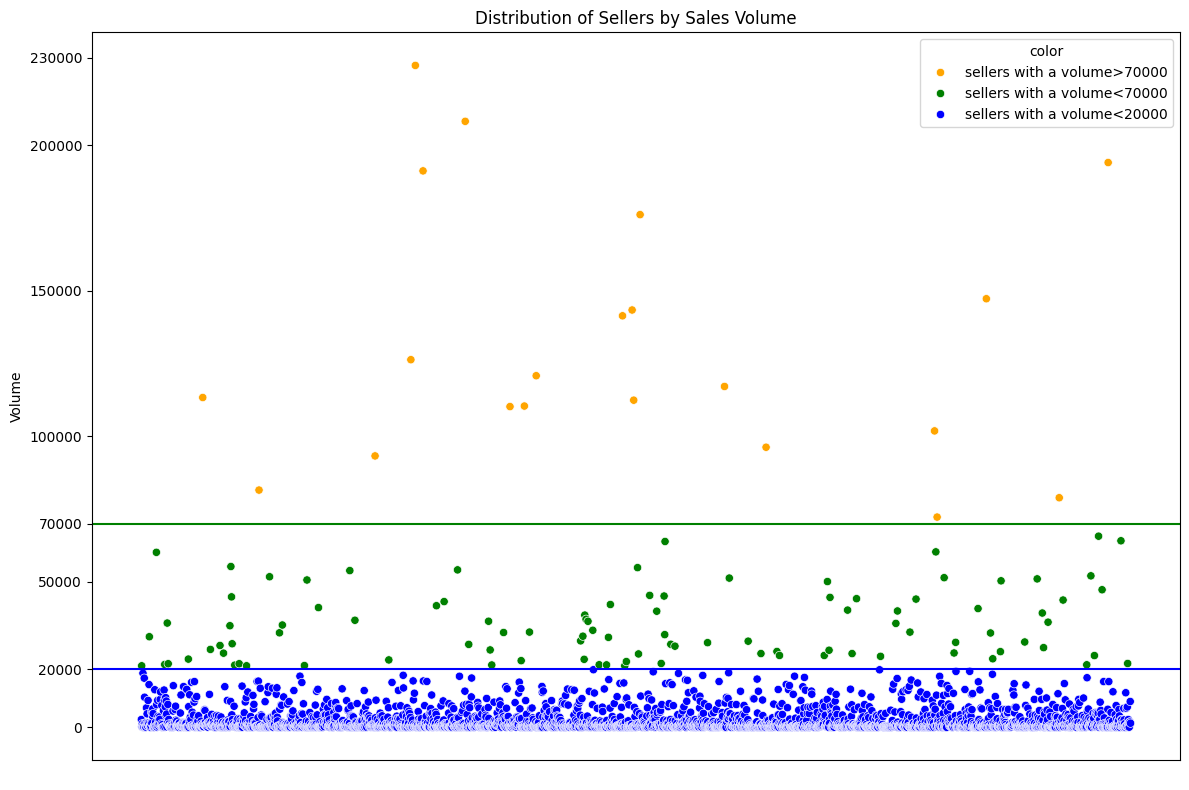

In [20]:
result_df.loc[result_df['sales_volume'] > 70000, 'color'] = "sellers with a volume>70000"
result_df.loc[(result_df['sales_volume'] > 20000) & (result_df['sales_volume'] <= 70000), 'color'] = "sellers with a volume<70000"
result_df.loc[result_df['sales_volume'] <= 20000, 'color'] = "sellers with a volume<20000"

hue_order = ["sellers with a volume>70000", "sellers with a volume<70000","sellers with a volume<20000"]
plt.figure(figsize=(12, 8)) 

sns.scatterplot(data=result_df, x='seller_id', y='sales_volume', hue='color', palette=['orange', 'green', 'blue'], hue_order=hue_order)

plt.axhline(y=70000, color='green', linestyle='-', label='70000')  
plt.axhline(y=20000, color='blue', linestyle='-', label='20000')  

plt.title('Distribution of Sellers by Sales Volume')
plt.xlabel('  ')
plt.ylabel('Volume')
plt.yticks([0,20000,50000, 100000, 150000, 200000, 230000, 70000])
plt.xticks([]) 
plt.tight_layout() 

plt.savefig('new_data_task2/Distribution_of_Sellers_by_Sales_Volume.png', bbox_inches='tight')

plt.show()

In [21]:
order_items_sellers_df = pd.merge(order_items_df, sellers_df, on='seller_id', how='left')
print(len(order_items_sellers_df['seller_id']))
order_items_sellers_df.head()

112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [22]:
sales_by_state = order_items_sellers_df.groupby('seller_state')['price'].sum().reset_index()

top_sellers_by_state = order_items_sellers_df.groupby(['seller_state', 'seller_id'])['price'].sum().reset_index()
top_sellers_by_state = top_sellers_by_state.sort_values(by=['seller_state', 'price'], ascending=[True, False])
top_sellers_by_state = top_sellers_by_state.groupby('seller_state').head(1)
top_sellers_by_state = top_sellers_by_state.rename(columns={'seller_id': 'top_seller_id', 'price': 'top_volume'})

bottom_sellers_by_state = order_items_sellers_df.groupby(['seller_state', 'seller_id'])['price'].sum().reset_index()
bottom_sellers_by_state = bottom_sellers_by_state.sort_values(by=['seller_state', 'price'], ascending=[True, True])
bottom_sellers_by_state = bottom_sellers_by_state.groupby('seller_state').head(1)
bottom_sellers_by_state = bottom_sellers_by_state.rename(columns={'seller_id': 'bottom_seller_id', 'price': 'bottom_volume'})

combined_sellers_by_state_df = pd.merge(top_sellers_by_state, bottom_sellers_by_state, on='seller_state', how='left')

combined_sellers_by_state_df.head()

,seller_state,top_seller_id,top_volume,bottom_seller_id,bottom_volume
0,AC,4be2e7f96b4fd749d52dff41f80e39dd,267.00,4be2e7f96b4fd749d52dff41f80e39dd,267.0
1,AM,327b89b872c14d1c0be7235ef4871685,1177.00,327b89b872c14d1c0be7235ef4871685,1177.0
2,BA,53243585a1d6dc2643021fd1853d8905,222776.05,43753b27d77860f1654aa72e251a7878,23.9
3,CE,bbf9ad41dca6603e614efcdad7aab8c4,7846.00,d4828feed4cda2cd9d6b37899a95a71e,39.9
4,DF,44073f8b7e41514de3b7815dd0237f4f,18729.64,43b2c864251aa0ce4030c746984e088a,94.8


In [23]:
total_sales_volume_df = order_items_sellers_df.groupby('seller_state')['price'].sum().reset_index()

total_sales_volume_df.rename(columns={'price': 'total_sales_volume'}, inplace=True)

In [24]:
combined_df_sorted = pd.merge(combined_sellers_by_state_df, total_sales_volume_df, on='seller_state', how='left')
combined_df_sorted.head()

,seller_state,top_seller_id,top_volume,bottom_seller_id,bottom_volume,total_sales_volume
0,AC,4be2e7f96b4fd749d52dff41f80e39dd,267.00,4be2e7f96b4fd749d52dff41f80e39dd,267.0,267.00
1,AM,327b89b872c14d1c0be7235ef4871685,1177.00,327b89b872c14d1c0be7235ef4871685,1177.0,1177.00
2,BA,53243585a1d6dc2643021fd1853d8905,222776.05,43753b27d77860f1654aa72e251a7878,23.9,285561.56
3,CE,bbf9ad41dca6603e614efcdad7aab8c4,7846.00,d4828feed4cda2cd9d6b37899a95a71e,39.9,20240.64
4,DF,44073f8b7e41514de3b7815dd0237f4f,18729.64,43b2c864251aa0ce4030c746984e088a,94.8,97749.48


In [25]:
# Оскільки дані для даних штатів однакові, тобто у них всього 1 продавець, перемістимо їх у кінець для кращого відображення
move_to_end_values = ['AC', 'AM', 'MA', 'PA', 'PI']
filtered_rows = combined_df_sorted[combined_df_sorted['seller_state'].isin(move_to_end_values)]

combined_df_sorted = combined_df_sorted[~combined_df_sorted['seller_state'].isin(move_to_end_values)]

combined_df_sorted = combined_df_sorted.sort_values(by='total_sales_volume', ascending=False)

combined_df_sorted = pd.concat([combined_df_sorted, filtered_rows])

combined_df_sorted.tail(10)  

,seller_state,top_seller_id,top_volume,bottom_seller_id,bottom_volume,total_sales_volume
10,MT,2dee2ce60de9709b1a24083217181a1f,7784.50,1e9d5a33694bddb76316fd1f54734d20,318.00,17070.72
17,RN,02d35243ea2e497335cd0f076b45675d,5794.00,392f7f2c797e4dc077e4311bde2ab8ce,52.00,9992.60
9,MS,b1fecf4da1fa2689bccffa0121953643,3669.64,7d484ca289afaac6bf5fc6a1e96d2226,183.20,8551.69
18,RO,3364a91ec4d56c98e44174de954b94f6,3579.94,a5259c149128e82c9d6d46e0c1c812bb,1182.26,4762.20
21,SE,4b39558c138930b9e5489c93b6df5fe3,1096.70,c53bcd3be457a342a97e39e5a9f0be22,509.50,1606.20
0,AC,4be2e7f96b4fd749d52dff41f80e39dd,267.00,4be2e7f96b4fd749d52dff41f80e39dd,267.00,267.00
1,AM,327b89b872c14d1c0be7235ef4871685,1177.00,327b89b872c14d1c0be7235ef4871685,1177.00,1177.00
7,MA,06a2c3af7b3aee5d69171b0e14f0ee87,36408.95,06a2c3af7b3aee5d69171b0e14f0ee87,36408.95,36408.95
11,PA,67225bff54a172ff67579aaf583efd78,1238.00,67225bff54a172ff67579aaf583efd78,1238.00,1238.00
14,PI,47efca563408aae19bb7206c2d969ea9,2522.00,47efca563408aae19bb7206c2d969ea9,2522.00,2522.00


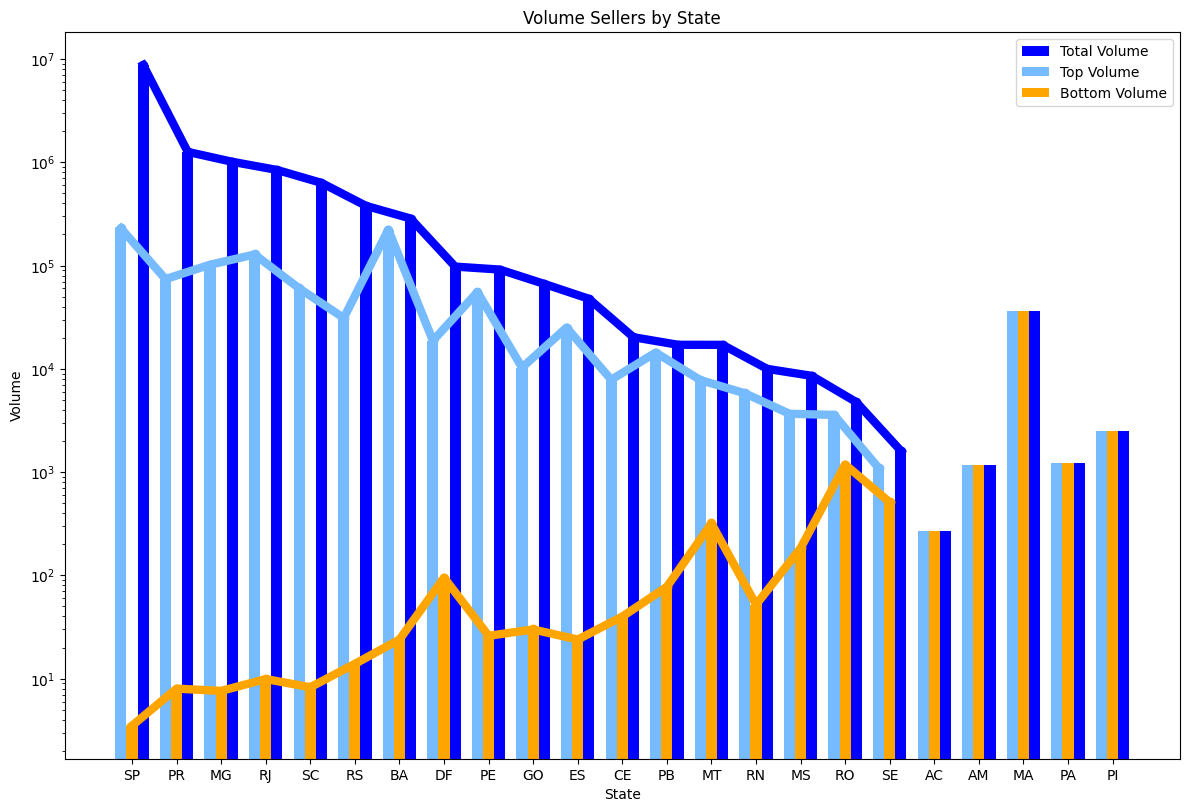

In [26]:
seller_states = combined_df_sorted['seller_state']
top_volume = combined_df_sorted['top_volume']
bottom_volume = combined_df_sorted['bottom_volume']
total_sales_volume = combined_df_sorted['total_sales_volume']

# індекс для кожного продавця
index = np.arange(len(seller_states))

bar_width = 0.25  

fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(index - bar_width, top_volume, width=bar_width, label='Top Volume', color='xkcd:sky blue')
bar2 = ax.bar(index, bottom_volume, width=bar_width, label='Bottom Volume', color='orange')
bar3 = ax.bar(index + bar_width, total_sales_volume, width=bar_width, label='Total Volume', color='blue')

ax.set_xticks(index)
ax.set_xticklabels(seller_states)
ax.set_xlabel('State')
ax.set_ylabel('Volume')

orange_coords = [(p.get_x() + p.get_width() / 2, p.get_height()) for p in bar2[:-5]]
line = plt.plot(*zip(*orange_coords), marker='o', color='orange',  linestyle='-',  linewidth=6)

sky_blue_coords = [(p.get_x() + p.get_width() / 2, p.get_height()) for p in bar1[:-5]]
line = plt.plot(*zip(*sky_blue_coords), marker='o', color='xkcd:sky blue', linestyle='-',  linewidth=6)

blue_coords = [(p.get_x() + p.get_width() / 2, p.get_height()) for p in bar3[:-5]]
line = plt.plot(*zip(*blue_coords), marker='o', color='blue', linestyle='-',  linewidth=6)

handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[2], handles[0], handles[1]], ['Total Volume', 'Top Volume', 'Bottom Volume'])
plt.yscale('log')
plt.tight_layout()
plt.title('Volume Sellers by State') 

plt.savefig('new_data_task2/sellers_by_volume_sales.png', bbox_inches='tight')

plt.show()

In [27]:
grouped_df = combined_df_sorted.groupby('seller_state').apply(lambda x: (x['top_volume'] * 100) / x['total_sales_volume']).round(1).reset_index(name='dependence_from_top_seller_percentage')
grouped_df.drop('level_1', axis=1, inplace=True)

combined_df_sorted = pd.merge(combined_df_sorted, grouped_df, on='seller_state')
combined_df_sorted.head()

,seller_state,top_seller_id,top_volume,bottom_seller_id,bottom_volume,total_sales_volume,dependence_from_top_seller_percentage
0,SP,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,cf6f6bc4df3999b9c6440f124fb2f687,3.50,8753396.21,2.6
1,PR,ccc4bbb5f32a6ab2b7066a4130f114e3,74004.62,34aefe746cd81b7f3b23253ea28bef39,8.00,1261887.21,5.9
2,MG,a1043bafd471dff536d0c462352beb48,101901.16,702835e4b785b67a084280efca355756,7.60,1011564.74,10.1
3,RJ,46dc3b2cc0980fb8ec44634e21d2718e,128111.19,c18309219e789960add0b2255ca4b091,9.90,843984.22,15.2
4,SC,04308b1ee57b6625f47df1d56f00eedf,60130.60,ad14615bdd492b01b0d97922e87cb87f,8.25,632426.07,9.5


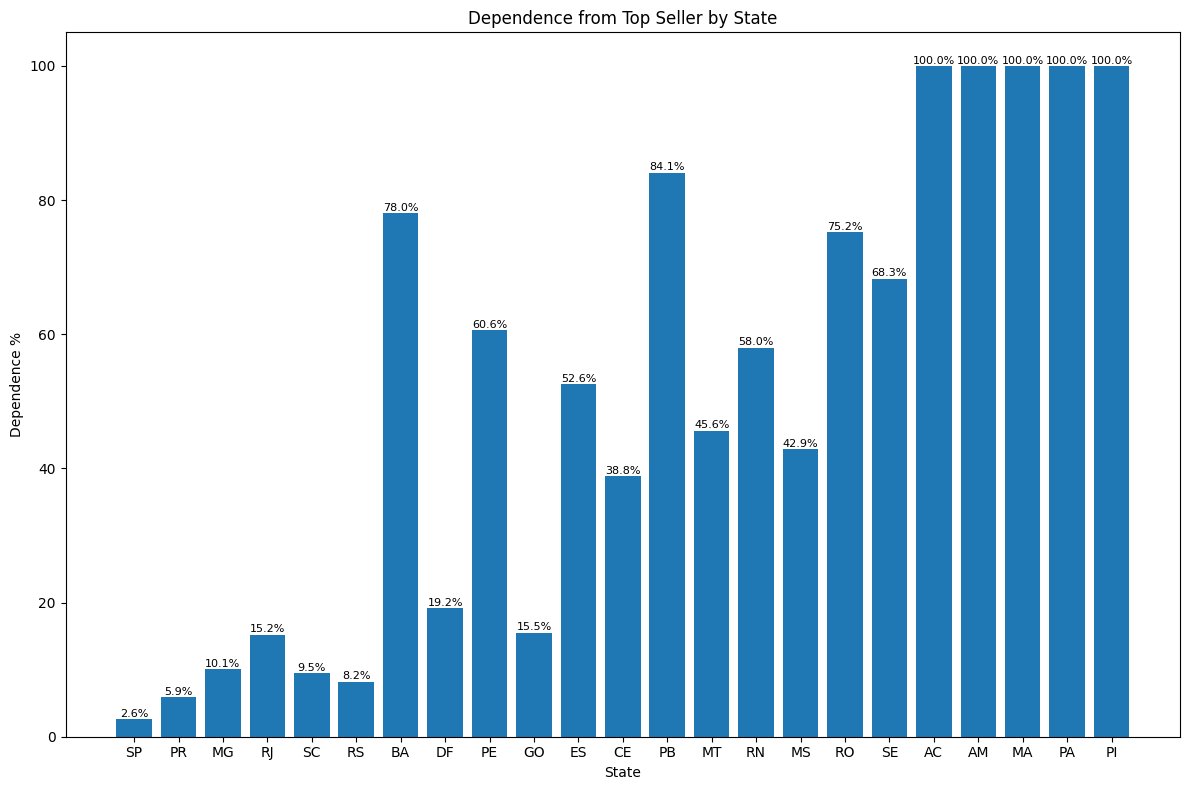

In [28]:
seller_states = combined_df_sorted['seller_state']
dependence_percentages = combined_df_sorted['dependence_from_top_seller_percentage']

plt.figure(figsize=(12, 8)) 
bars = plt.bar(seller_states, dependence_percentages)  

for bar, val in zip(bars, dependence_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{val}%', ha='center', va='bottom', fontsize=8)

plt.xlabel('State') 
plt.ylabel('Dependence %')  
plt.title('Dependence from Top Seller by State') 
plt.tight_layout()  

plt.savefig('new_data_task2/dependence_from_top_seller_percentage.png', bbox_inches='tight')

plt.show() 

In [29]:
total_sales_all_states = combined_df_sorted['total_sales_volume'].sum()

combined_df_sorted['dependence_from_state'] = (combined_df_sorted['total_sales_volume'] / total_sales_all_states) * 100

combined_df_sorted.head()

,seller_state,top_seller_id,top_volume,bottom_seller_id,bottom_volume,total_sales_volume,dependence_from_top_seller_percentage,dependence_from_state
0,SP,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,cf6f6bc4df3999b9c6440f124fb2f687,3.50,8753396.21,2.6,64.402779
1,PR,ccc4bbb5f32a6ab2b7066a4130f114e3,74004.62,34aefe746cd81b7f3b23253ea28bef39,8.00,1261887.21,5.9,9.284287
2,MG,a1043bafd471dff536d0c462352beb48,101901.16,702835e4b785b67a084280efca355756,7.60,1011564.74,10.1,7.442549
3,RJ,46dc3b2cc0980fb8ec44634e21d2718e,128111.19,c18309219e789960add0b2255ca4b091,9.90,843984.22,15.2,6.209582
4,SC,04308b1ee57b6625f47df1d56f00eedf,60130.60,ad14615bdd492b01b0d97922e87cb87f,8.25,632426.07,9.5,4.653051


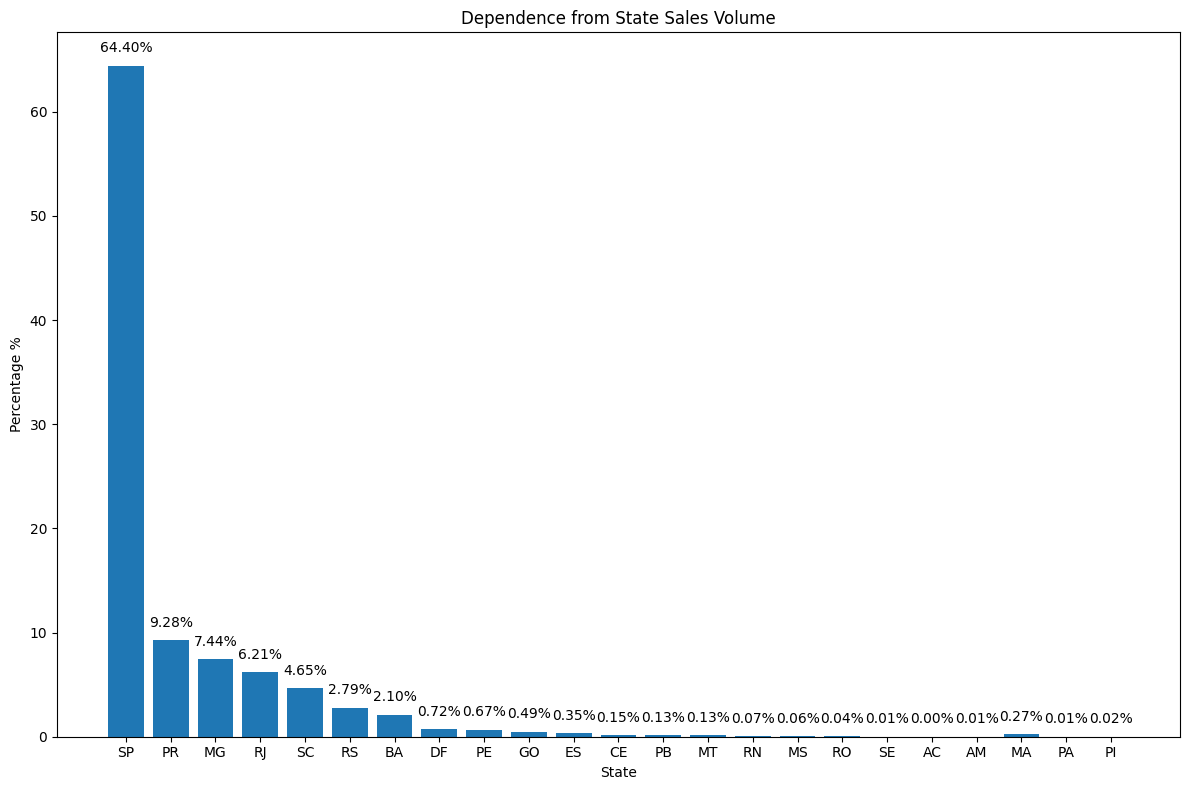

In [30]:
plt.figure(figsize=(12, 8))  

bars = plt.bar(combined_df_sorted['seller_state'], combined_df_sorted['dependence_from_state'])

for bar, value in zip(bars, combined_df_sorted['dependence_from_state']):
    yval = value + 1  
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{value:.2f}%', ha='center', va='bottom')

plt.xlabel('State')  
plt.ylabel('Percentage %')  
plt.title('Dependence from State Sales Volume') 
plt.tight_layout() 

plt.savefig('new_data_task2/dependence_from_state_percentage.png', bbox_inches='tight')

plt.show()